# Projeto 1 - Simulação da visão daltônica
***Engenharia da Computação Insper - Visão Computacional 2018.2***
               
               Leonardo Medeiros e Martim Ferreira José

  Para compreender melhor como as cores funcionam, foi elaborado um projeto que simula a visão daltônica. Para isto, utilizamos a técnica descrita no artigo _“Digital Video Colourmaps for Checking the Legibility of Displays by Dichromats”_ (1999), para transformar uma imagem de coloração "normal" em uma imagem vista por um daltônico com protanopia ou deuteranopia.

    


## Instalando as dependências

Neste notebook utilizamos as seguintes bibliotecas:

    numpy
    opencv-python
    matplotlib
    
Elas podem ser instaladas rodando o bloco de código a seguir:

In [72]:
from IPython.display import clear_output
#OBS: Descomente a linha respectiva a sua versão Python.

#!pip3 install numpy matplotlib opencv-python
# ou
#!pip install numpy matplotlib opencv-python

clear_output()

## Importando as bibliotecas

In [73]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Qual imagem você deseja utilizar como exemplo?

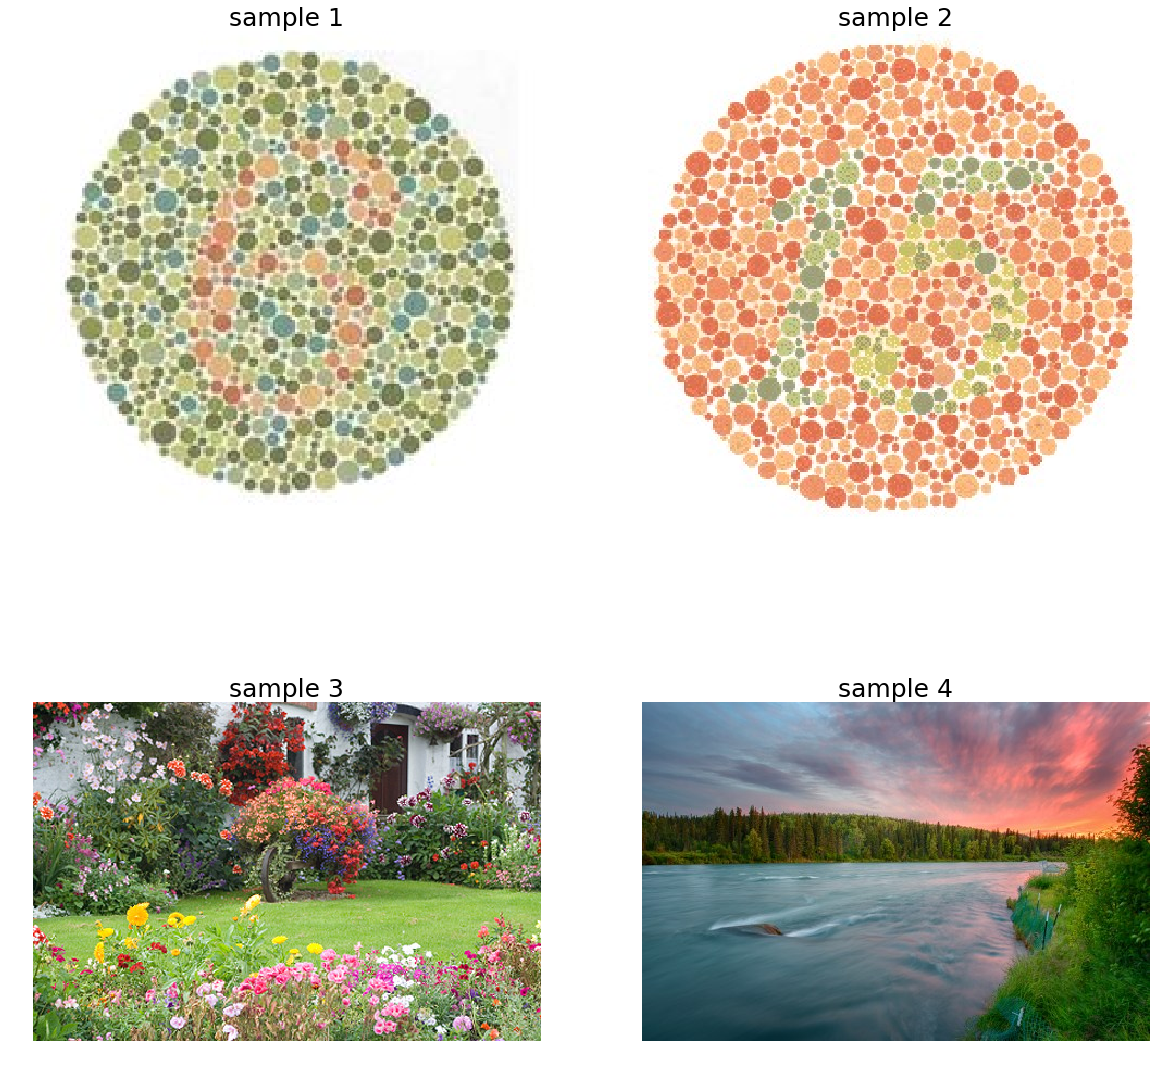

In [74]:
sample_image1 = cv2.imread("./img/sample_image1.jpg")
sample_image2 = cv2.imread("./img/sample_image2.jpg")
sample_image3 = cv2.imread("./img/sample_image3.jpg")
sample_image4 = cv2.imread("./img/sample_image4.jpg")

fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('sample 1', fontsize=25)
plt.imshow(cv2.cvtColor(sample_image1, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('sample 2', fontsize=25)
plt.imshow(cv2.cvtColor(sample_image2, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('sample 3', fontsize=25)
plt.imshow(cv2.cvtColor(sample_image3, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('sample 4', fontsize=25)
plt.imshow(cv2.cvtColor(sample_image4, cv2.COLOR_BGR2RGB))

Descomente a linha corresponente a imagem desejada a seguir:

In [75]:
#sample_image = cv2.cvtColor(sample_image1, cv2.COLOR_BGR2RGB)
#sample_image = cv2.cvtColor(sample_image2, cv2.COLOR_BGR2RGB)
#sample_image = cv2.cvtColor(sample_image3, cv2.COLOR_BGR2RGB)
sample_image = cv2.cvtColor(sample_image4, cv2.COLOR_BGR2RGB)

img_size = sample_image.shape

No item 1 do artigo, os autores calculam as quantidades fotométricas relativas R, G, B. Que pode ser feita por meio do código abaixo:

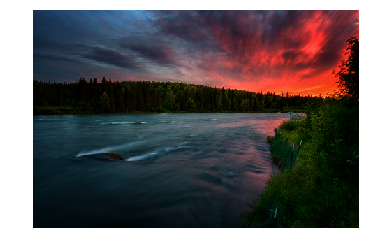

In [76]:
rgb_atenuation = sample_image.copy()

rgb_atenuation = (rgb_atenuation / 255.0) ** 2.2

plt.axis('off')
plt.imshow(rgb_atenuation)

No item 2, para produzir cores reduzidas incluídas no
a gama de cores do monitor, o domínio de cores da paleta inicial é ligeiramente atenuado, escalonando das grandezas fotométricas relativas.

In [77]:
result_protanopes   = rgb_atenuation.copy()
result_deuteranopes = rgb_atenuation.copy()

result_protanopes = 0.992052*result_protanopes + 0.003974
result_deuteranopes = 0.957237*result_deuteranopes + 0.0213814

A partir disto, podemos converter os valores de RGB para LMS, multiplicando a matriz RGB (3,1) por uma matriz criada pelos pesquisadores, composta por constantes.

O LMS... **falar do LMS** (tem no artigo).

In [78]:
def MultiplicarMatriz(matriz_P, matriz_D, imagem_P, imagem_D, size):
    for i in range(size[0]):
        for j in range(size[1]):
            
            matriz_Auxiliar  = np.reshape(imagem_P[i][j], (3,1))   
            matriz_Auxiliar2 = np.reshape(imagem_D[i][j], (3,1)) 
    
            matriz_Auxiliar  = np.matmul(matriz_P, matriz_Auxiliar)
            matriz_Auxiliar2 = np.matmul(matriz_D, matriz_Auxiliar2)
        
            imagem_P[i][j] = np.reshape(matriz_Auxiliar, (1,3))
            imagem_D[i][j] = np.reshape(matriz_Auxiliar2, (1,3))
    
    return imagem_P, imagem_D

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


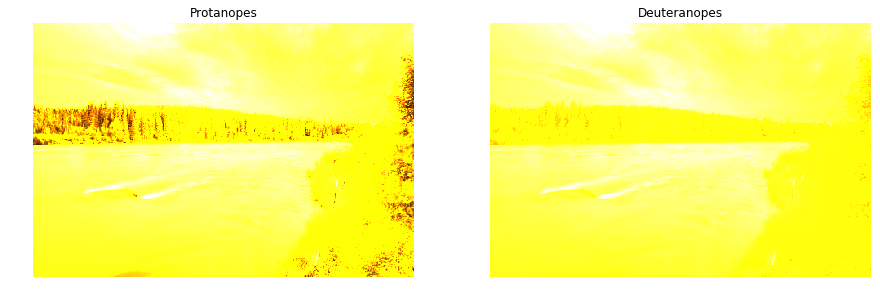

In [79]:
result_protanopes_LMS = result_protanopes.copy() 
result_deuteranopes_LMS = result_deuteranopes.copy()

convertion_RGB2LMS = np.array([[17.8824, 43.5161, 4.11935],[3.45565, 27.1554, 3.86714],[0.0299566, 0.184309, 1.46709]])

result_protanopes_LMS, result_deuteranopes_LMS = MultiplicarMatriz(convertion_RGB2LMS, convertion_RGB2LMS, result_protanopes_LMS, result_deuteranopes_LMS, img_size)
              
fig = plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt. title('Protanopes')
plt.axis('off')
plt.imshow(result_protanopes_LMS)

plt.subplot(1, 2, 2)
plt.title('Deuteranopes')
plt.axis('off')
plt.imshow(result_deuteranopes_LMS)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


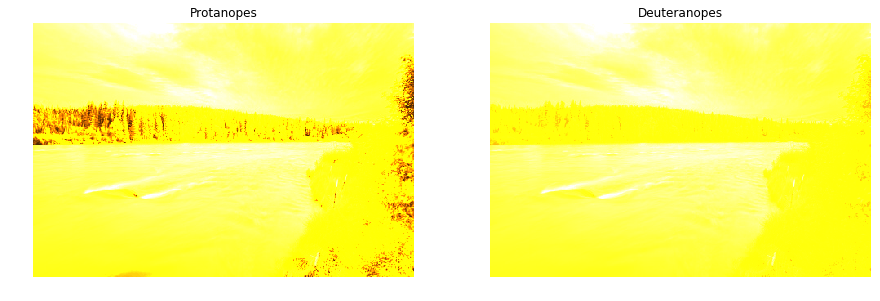

In [80]:
convertion_LMS2LMS_P = np.array([[0, 2.02344, -2.52581],[0, 1, 0],[0, 0, 1]])
convertion_LMS2LMS_D = np.array([[1, 0, 0],[0.494207, 0, 1.24827],[0, 0, 1]])

result_protanopes_LMS, result_deuteranopes_LMS = MultiplicarMatriz(convertion_LMS2LMS_P, convertion_LMS2LMS_D, result_protanopes_LMS, result_deuteranopes_LMS, img_size)

fig = plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title('Protanopes')
plt.axis('off')
plt.imshow(result_protanopes_LMS)

plt.subplot(1, 2, 2)
plt.title('Deuteranopes')
plt.axis('off')
plt.imshow(result_deuteranopes_LMS)

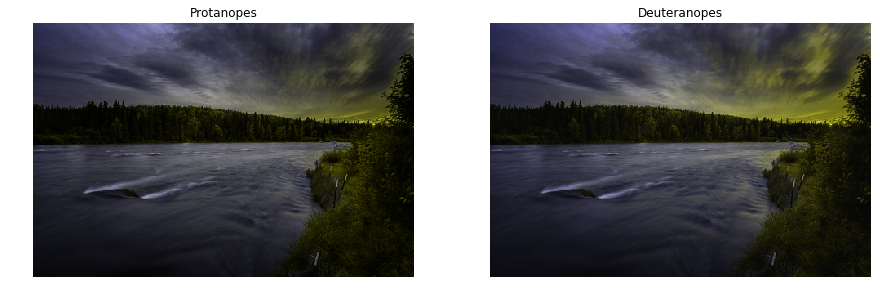

In [81]:
result_protanopes_RGB = result_protanopes_LMS.copy() 
result_deuteranopes_RGB = result_deuteranopes_LMS.copy()

convertion_LMS2RGB = np.linalg.inv(convertion_RGB2LMS)

result_protanopes_RGB, result_deuteranopes_RGB = MultiplicarMatriz(convertion_LMS2RGB, convertion_LMS2RGB, result_protanopes_RGB, result_deuteranopes_RGB, img_size)

fig = plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title('Protanopes')
plt.axis('off')
plt.imshow(result_protanopes_RGB)

plt.subplot(1, 2, 2)
plt.title('Deuteranopes')
plt.axis('off')
plt.imshow(result_deuteranopes_RGB)


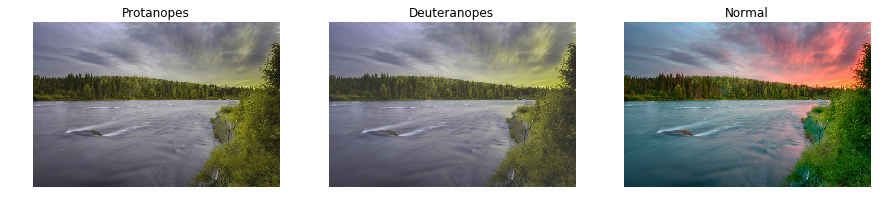

In [82]:
result_protanopes_RGB = np.uint8((result_protanopes_RGB ** (1/2.2))*255.0)
result_deuteranopes_RGB = np.uint8((result_deuteranopes_RGB ** (1/2.2))*255.0)

fig = plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1)
plt.title('Protanopes')
plt.axis('off')
plt.imshow(result_protanopes_RGB)

plt.subplot(1, 3, 2)
plt.title('Deuteranopes')
plt.axis('off')
plt.imshow(result_deuteranopes_RGB)

plt.subplot(1, 3, 3)
plt.title('Normal')
plt.axis('off')
plt.imshow(sample_image)